In [2]:
import numpy as np
import cv2

In [3]:
def T(v):
    w=np.zeros((3,1))
    w[0,0]=3*v[0,0]
    w[2,0]=-2*v[1,0]
    
    return w

In [4]:
v=np.array([[3],[5]])
w=T(v)

print("Original vector:\n",v,"\n\n Result of the Transformation:\n",w)

Original vector:
 [[3]
 [5]] 

 Result of the Transformation:
 [[  9.]
 [  0.]
 [-10.]]


In [5]:
u=np.array([[1],[-2]])
v=np.array([[2],[4]])

k=7

print("T(k*v):\n",T(k*v),"\n k*T(v):\n",k*T(v),"\n\n")
print("T(u+v):\n",T(u+v),"\n T(u)+T(v):\n",T(u)+T(v))

T(k*v):
 [[ 42.]
 [  0.]
 [-56.]] 
 k*T(v):
 [[ 42.]
 [  0.]
 [-56.]] 


T(u+v):
 [[ 9.]
 [ 0.]
 [-4.]] 
 T(u)+T(v):
 [[ 9.]
 [ 0.]
 [-4.]]


In [6]:
def L(v):
    A=np.array([[3,0],[0,0],[0,-2]])
    print("Transformation matrix:\n",A,"\n")
    w=A@v
    
    return w

In [7]:
v=np.array([[3],[5]])
w=L(v)

print("original vector:\n",v,"\n\n Result of the transformation:\n",w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


In [9]:
def T_hscaling(v):
    A=np.array([[2,0],[0,1]])
    w=A@v
    
    return w

In [10]:
def transform_vectors(T,v1,v2):
    V=np.hstack((v1,v2))
    W=T(V)
    
    return W
    

In [11]:
e1=np.array([[1],[0]])
e2=np.array([[0],[1]])

transformation_result_hscaling=transform_vectors(T_hscaling,e1,e2)

print("original vectors:\n",np.hstack((e1,e2)),"\n\n Result of the transformation:\n",transformation_result_hscaling)

original vectors:
 [[1 0]
 [0 1]] 

 Result of the transformation:
 [[2 0]
 [0 1]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

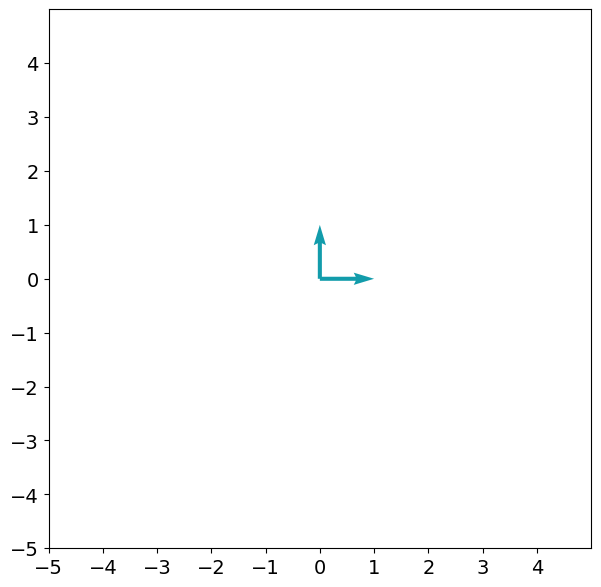

In [12]:
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0],[0, 0], [e1[0], e2[0]], [e1[1], e2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0], e1[0], e1[0]], 
             [0, e2[1], e2[1], e1[1]], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
    ax.text(e1[0]-0.2+e1_sgn[0], e1[1]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
    ax.text(e2[0]-0.2+e2_sgn[0], e2[1]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0],[0, 0], [e1_transformed[0], e2_transformed[0]], [e1_transformed[1], e2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,e2_transformed[0], e1_transformed[0]+e2_transformed[0], e1_transformed[0]], 
             [0,e2_transformed[1], e1_transformed[1]+e2_transformed[1], e1_transformed[1]], 
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)])
    ax.text(e1_transformed[0][0]-0.2+e1_transformed_sgn[0], e1_transformed[1][0]-e1_transformed_sgn[1][0], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)])
    ax.text(e2_transformed[0][0]-0.2+e2_transformed_sgn[0][0], e2_transformed[1][0]-e2_transformed_sgn[1][0], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(T_hscaling, e1, e2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

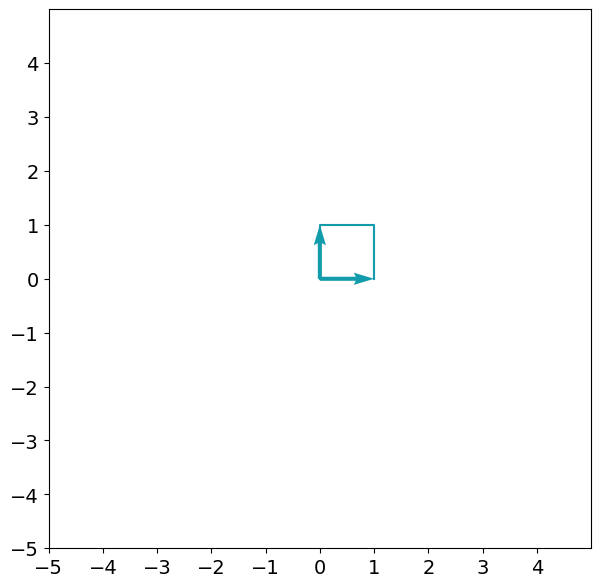

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"

    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))

    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0], [0, 0], [e1[0, 0], e2[0, 0]], [e1[1, 0], e2[1, 0]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0, 0], e1[0, 0], e1[0, 0]], 
             [0, e2[1, 0], e2[1, 0], e1[1, 0]], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
    ax.text(e1[0, 0]-0.2+e1_sgn[0], e1[1, 0]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
    ax.text(e2[0, 0]-0.2+e2_sgn[0], e2[1, 0]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)

    e1_transformed = T(e1)
    e2_transformed = T(e2)

    plt.quiver([0, 0], [0, 0], [e1_transformed[0, 0], e2_transformed[0, 0]], [e1_transformed[1, 0], e2_transformed[1, 0]],
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2_transformed[0, 0], e1_transformed[0, 0]+e2_transformed[0, 0], e1_transformed[0, 0]],
             [0, e2_transformed[1, 0], e1_transformed[1, 0]+e2_transformed[1, 0], e1_transformed[1, 0]],
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)])
    ax.text(e1_transformed[0, 0]-0.2+e1_transformed_sgn[0], e1_transformed[1, 0]-e1_transformed_sgn[1], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)])
    ax.text(e2_transformed[0, 0]-0.2+e2_transformed_sgn[0], e2_transformed[1, 0]-e2_transformed_sgn[1], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)

    plt.gca().set_aspect("equal")
    plt.show()

plot_transformation(T_hscaling, e1, e2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

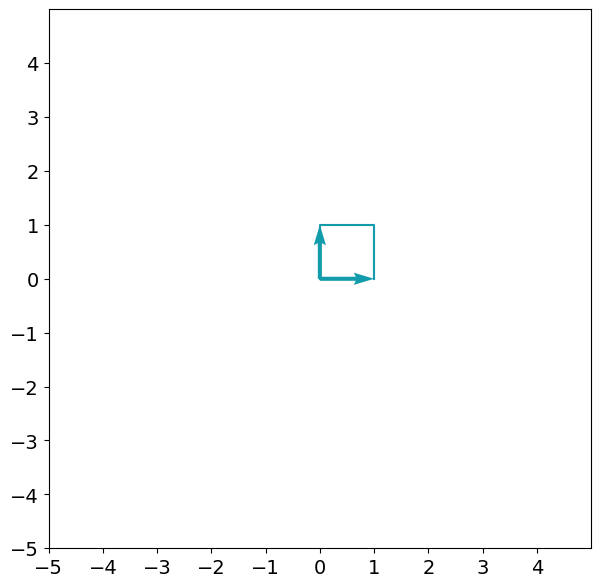

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transformation function
def T_hscaling(v):
    A = np.array([[2, 0], [0, 1]])
    w = A @ v
    return w

# Define the basis vectors
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

# Define the plot_transformation function
def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0], [0, 0], [e1[0, 0], e2[0, 0]], [e1[1, 0], e2[1, 0]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0, 0], e1[0, 0], e1[0, 0]], 
             [0, e2[1, 0], e2[1, 0], e1[1, 0]], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
    ax.text(e1[0, 0]-0.2+e1_sgn[0], e1[1, 0]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
    ax.text(e2[0, 0]-0.2+e2_sgn[0], e2[1, 0]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0], [0, 0], [e1_transformed[0, 0], e2_transformed[0, 0]], [e1_transformed[1, 0], e2_transformed[1, 0]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2_transformed[0, 0], e1_transformed[0, 0]+e2_transformed[0, 0], e1_transformed[0, 0]], 
             [0, e2_transformed[1, 0], e1_transformed[1, 0]+e2_transformed[1, 0], e1_transformed[1, 0]], 
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)])
    ax.text(e1_transformed[0, 0]-0.2+e1_transformed_sgn[0], e1_transformed[1, 0]-e1_transformed_sgn[1], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)])
    ax.text(e2_transformed[0, 0]-0.2+e2_transformed_sgn[0], e2_transformed[1, 0]-e2_transformed_sgn[1], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()

# Call the function
plot_transformation(T_hscaling, e1, e2)

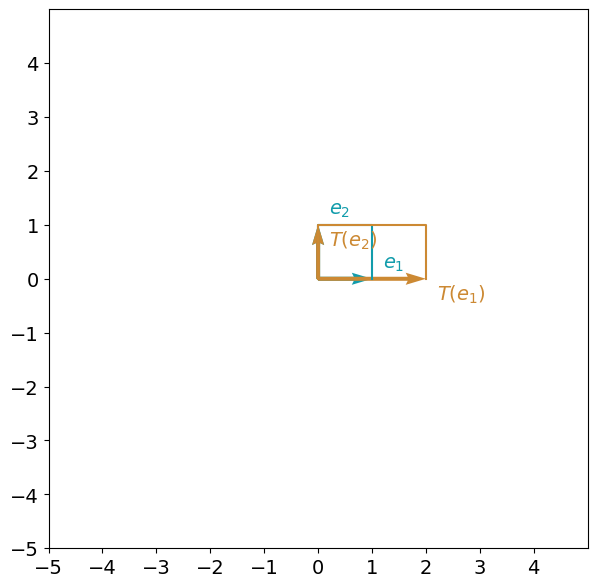

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transformation function
def T_hscaling(v):
    A = np.array([[2, 0], [0, 1]])
    w = A @ v
    return w

# Define the basis vectors
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

# Define the plot_transformation function
def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"

    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))

    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0], [0, 0], [e1[0, 0], e2[0, 0]], [e1[1, 0], e2[1, 0]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0, 0], e1[0, 0], e1[0, 0]],
             [0, e2[1, 0], e2[1, 0], e1[1, 0]],
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1.flatten())])
    ax.text(e1[0, 0]-0.2+e1_sgn[0], e1[1, 0]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2.flatten())])
    ax.text(e2[0, 0]-0.2+e2_sgn[0], e2[1, 0]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)

    e1_transformed = T(e1)
    e2_transformed = T(e2)

    plt.quiver([0, 0], [0, 0], [e1_transformed[0, 0], e2_transformed[0, 0]], [e1_transformed[1, 0], e2_transformed[1, 0]],
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2_transformed[0, 0], e1_transformed[0, 0]+e2_transformed[0, 0], e1_transformed[0, 0]],
             [0, e2_transformed[1, 0], e1_transformed[1, 0]+e2_transformed[1, 0], e1_transformed[1, 0]],
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed.flatten())])
    ax.text(e1_transformed[0, 0]-0.2+e1_transformed_sgn[0], e1_transformed[1, 0]-e1_transformed_sgn[1],
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed.flatten())])
    ax.text(e2_transformed[0, 0]-0.2+e2_transformed_sgn[0], e2_transformed[1, 0]-e2_transformed_sgn[1],
            f'$T(e_2)$', fontsize=14, color=color_transformed)

    plt.gca().set_aspect("equal")
    plt.show()

# Call the function
plot_transformation(T_hscaling, e1, e2)

In [17]:
def T_reflection_yaxis(v):
    A=np.array([[-1,0],[0,1]])
    w=A@v
    
    return w

In [18]:
e1=np.array([[1],[0]])
e2=np.array([[0],[1]])

transformation_result_reflection_yaxis=transform_vectors(T_reflection_yaxis,e1,e2)
print("original vectors:\n",np.hstack((e1,e2)),"\n\n Result of the transformation:\n",transformation_result_reflection_yaxis)

original vectors:
 [[1 0]
 [0 1]] 

 Result of the transformation:
 [[-1  0]
 [ 0  1]]


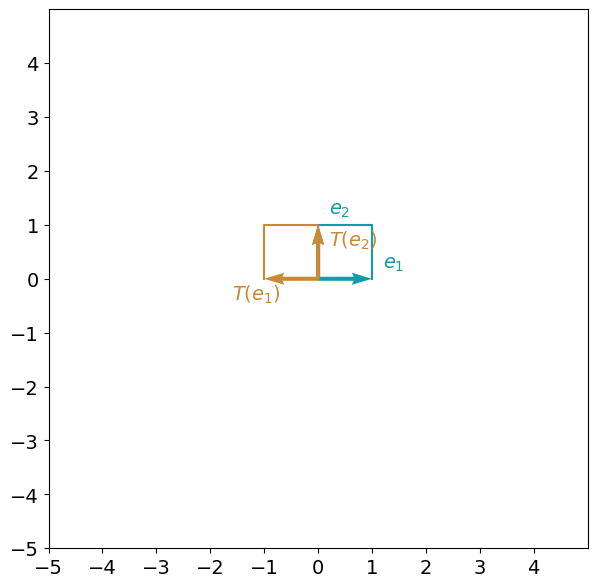

In [19]:
plot_transformation(T_reflection_yaxis,e1,e2)

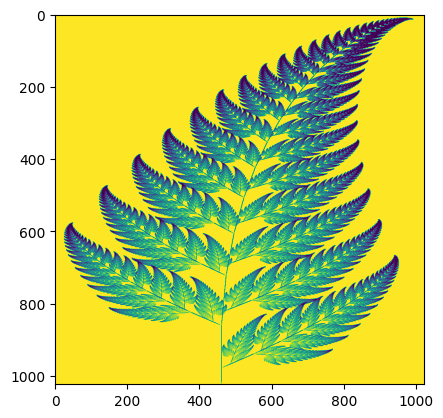

In [23]:
img=cv2.imread('images/img.png',0)
plt.imshow(img)

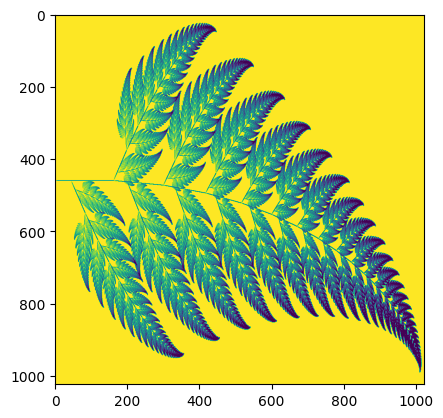

In [28]:
image_rotated=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_rotated)

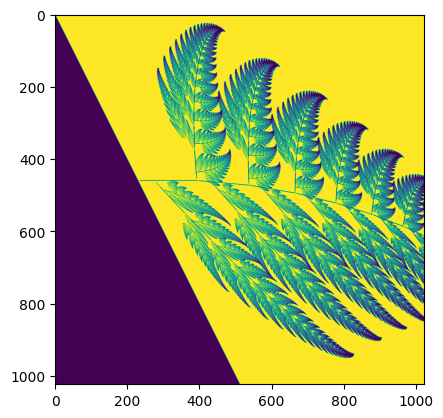

In [42]:
rows,cols=image_rotated.shape
M=np.float32([[1,0.5,0],[0,1,0],[0,0,1]])
image_rotated_sheared=cv2.warpPerspective(image_rotated,M,(int(cols),int(rows)))
plt.imshow(image_rotated_sheared)